In [43]:
#Importing Libraries

In [90]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [45]:
#Extract Filenames from Folder

In [51]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [52]:
len(filenames)

44440

In [48]:
#Importing ResNet50 Model and Cofiguration

In [11]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [30]:
#Extracting Fetaures from Image

In [48]:
import os
print(os.getcwd())


d:\vajib_projects\Fashion_design_recomondatiom\code


In [61]:
img = image.load_img('1525.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

FileNotFoundError: [Errno 2] No such file or directory: '1525.jpg'

In [63]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [67]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.01247239, 0.02726404,
       0.06899223], dtype=float32)

In [68]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

[array([0.        , 0.01761619, 0.00171607, ..., 0.01247239, 0.02726404,
        0.06899223], dtype=float32),
 array([0.        , 0.03648944, 0.        , ..., 0.00997914, 0.02375535,
        0.04649907], dtype=float32),
 array([0.        , 0.03642145, 0.00710438, ..., 0.00140772, 0.        ,
        0.05435038], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747743, ..., 0.00346686, 0.03391019,
        0.04565741], dtype=float32),
 array([0.00306834, 0.06240452, 0.        , ..., 0.00170625, 0.02032885,
        0.05833261], dtype=float32),
 array([0.        , 0.10469121, 0.00198092, ..., 0.        , 0.03033768,
        0.02712848], dtype=float32),
 array([0.        , 0.12438459, 0.01465612, ..., 0.00289706, 0.04055159,
        0.06534588], dtype=float32),
 array([0.        , 0.09169203, 0.01569912, ..., 0.        , 0.00503581,
        0.04560041], dtype=float32),
 array([0.        , 0.09545276, 0.01153318, ..., 0.00073009, 0.04513267,
        0.07661068], dtype=float32),
 array([0.

In [69]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [70]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [62]:
#Loading Pickle Files

In [71]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [72]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [73]:
np.array(Image_features).shape

(44440, 2048)

In [96]:
#Finidng Simialar Images

In [74]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [75]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [78]:
input_image = extract_features_from_images('images//1533.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [79]:
distance,indices = neighbors.kneighbors([input_image])

In [80]:
indices[0]

array([ 4489,  5367,  4531,  5291, 16081,  8695], dtype=int64)

In [81]:
from IPython.display import Image

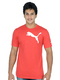

In [83]:
Image('images//1533.jpg')

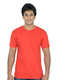

In [84]:
Image(filenames[indices[0][1]])

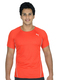

In [85]:
Image(filenames[indices[0][2]])

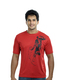

In [86]:
Image(filenames[indices[0][3]])

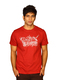

In [87]:
Image(filenames[indices[0][4]])

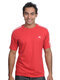

In [88]:
Image(filenames[indices[0][5]])